In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import qt3utils.experiments.cwodmr

from qt3utils.pulsers.pulseblaster import PulseBlasterCWODMR
import qt3utils.nidaq
import qt3rfsynthcontrol

In [5]:
import qt3utils
print(qt3utils.__version__)

1.0.2


In [8]:
logging.basicConfig(level=logging.WARNING)
qt3utils.experiments.cwodmr.logger.setLevel(logging.INFO)
datasources.daqsamplers.logger.setLevel(logging.INFO)

In [9]:
qt3rfsynthcontrol.discover_devices()

[['COM3',
  'Intel(R) Active Management Technology - SOL (COM3)',
  'PCI\\VEN_8086&DEV_43E3&SUBSYS_0A541028&REV_11\\3&11583659&1&B3'],
 ['COM5',
  'USB Serial Device (COM5)',
  'USB VID:PID=0483:A3E5 SER=206A36705430 LOCATION=1-9:x.0'],
 ['COM6',
  'piezojena NV40/3CL USB (COM6)',
  'USB VID:PID=0403:D161 SER=714151A'],
 ['COM7',
  'USB Serial Device (COM7)',
  'USB VID:PID=239A:8014 SER=3B0D07C25831555020312E341A3214FF LOCATION=1-5:x.0']]

In [10]:
rfsynth = qt3rfsynthcontrol.QT3SynthHD('COM5')

In [11]:
cwodmr_pulser = PulseBlasterCWODMR(pb_board_number=0, clock_period = 100e-9)

In [13]:
cwodmr_pulser.experimental_conditions()

{'rf_pulse_duration': 5e-06, 'clock_period': 1e-07}

In [14]:
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')

In [15]:
cwodmr_exp = qt3utils.experiments.cwodmr.CWODMR(cwodmr_pulser, rfsynth, nidaq_config,
                                                  rf_power=-20)

In [16]:
cwodmr_pulser.rf_pulse_duration = 10e-6


In [17]:
cwodmr_exp.experimental_conditions()

{'freq_low': 2820000000.0,
 'freq_high': 2920000000.0,
 'freq_step': 1000000.0,
 'rf_power': -20,
 'pulser': {'rf_pulse_duration': 1e-05, 'clock_period': 1e-07}}

In [18]:
cwodmr_exp.freq_low = 2730e6
cwodmr_exp.freq_high = 3030e6
cwodmr_exp.freq_step = 2e6
cwodmr_exp.rf_power = -10

In [19]:
scan_data = {'data':cwodmr_exp.run(N_cycles=40000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2730000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2732000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2734000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2736000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2738000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2740000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2742000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2744000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2746000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2748000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2750000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2752000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2754000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2756000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2758000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27600000

INFO:qt3utils.experiments.cwodmr:RF frequency: 2992000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2994000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2996000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2998000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3000000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3002000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3004000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3006000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3008000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3010000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3012000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3014000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3016000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3018000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 3020000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 30220000

<IPython.core.display.Javascript object>


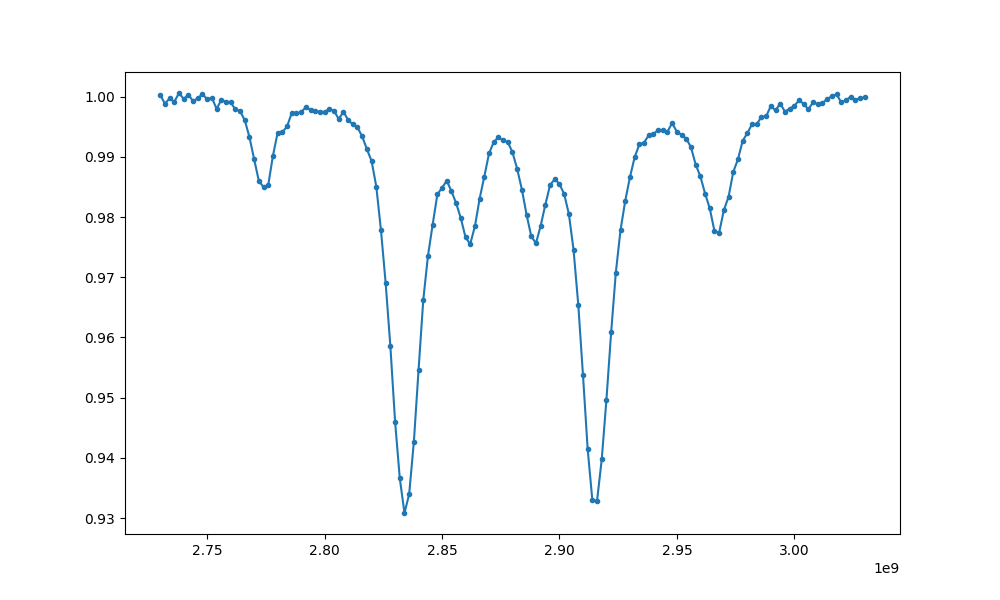

In [20]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')